In [1]:
import cv2
import os
import random
import matplotlib.pylab as plt
from glob import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# ../input/
PATH = os.path.abspath(os.path.join('..', 'Medical_Xray_CNN'))

# ../input/sample/images/
SOURCE_IMAGES = os.path.join(PATH, "img", "select")

# ../input/sample/images/*.png
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))

# Load labels
labels = pd.read_csv('Data_Entry_2017.csv')

In [4]:
labels

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143000,0.143000,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143000,0.143000,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168000,0.168000,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171000,0.171000,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143000,0.143000,NaN
5,00000003_001.png,Hernia,1,3,74,F,PA,2500,2048,0.168000,0.168000,NaN
6,00000003_002.png,Hernia,2,3,75,F,PA,2048,2500,0.168000,0.168000,NaN
7,00000003_003.png,Hernia|Infiltration,3,3,76,F,PA,2698,2991,0.143000,0.143000,NaN
8,00000003_004.png,Hernia,4,3,77,F,PA,2500,2048,0.168000,0.168000,NaN
9,00000003_005.png,Hernia,5,3,78,F,PA,2686,2991,0.143000,0.143000,NaN


/home/felipe/Medical_Xray_CNN/img/select/00007141_001.png
/home/felipe/Medical_Xray_CNN/img/select/00000543_000.png
/home/felipe/Medical_Xray_CNN/img/select/00016075_000.png


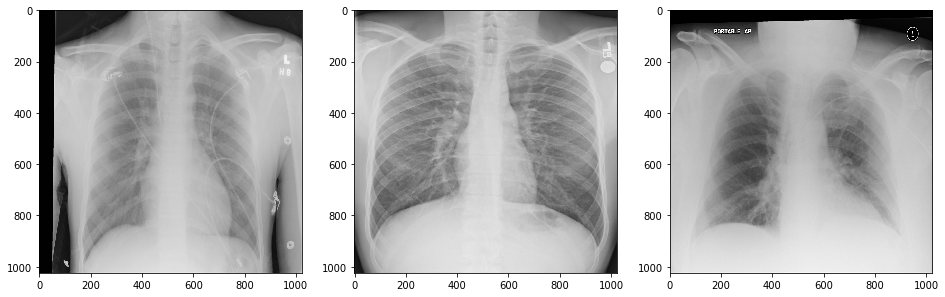

In [3]:
r = random.sample(images, 3)
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))
print(r[0])
print(r[1])
print(r[2])

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]))
plt.show()

In [5]:
def select_images():
    disease = 'No Finding'
    WIDTH = 224
    HEIGHT = 224
    for img in images:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        # Read and resize image
        if disease in finding:
            full_size_image = cv2.imread(img)
            resized = cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC)
            path = './img/no_findings_224_select'
            cv2.imwrite(os.path.join(path , '{}'.format(base)), resized)
    return

In [6]:
select_images()

# Check if the selections are correct!!

In [19]:
labels['Finding Labels'][labels['Image Index']=='00000744_003.png']

2801    Consolidation|Infiltration|Pneumothorax
Name: Finding Labels, dtype: object